In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [43]:
dataset = pd.read_csv('titanic_data.csv',sep=",")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
DataML = dataset[['Sex','Age','Fare','Survived']]
MedianAge = DataML['Age'].median()
print(MedianAge)
DataML['Age'].fillna(MedianAge,inplace=True)

Sex = DataML['Sex'].replace(['female','male'],[0,1])
DataML['Sex'] = Sex

DataML

28.0
C:\Users\feder\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-89-583e502d99d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataML['Sex'] = Sex


,Sex,Age,Fare,Survived
0,1,22.0,7.2500,0
1,0,38.0,71.2833,1
2,0,26.0,7.9250,1
3,0,35.0,53.1000,1
4,1,35.0,8.0500,0
...,...,...,...,...
886,1,27.0,13.0000,0
887,0,19.0,30.0000,1
888,0,28.0,23.4500,0
889,1,26.0,30.0000,1


In [107]:
X = DataML[['Sex','Age']]
y = DataML['Survived']
Train_x,Test_x,Train_y,Test_y = train_test_split(X,y,stratify=DataML['Sex'],test_size=0.2)

In [108]:
parameters = {'n_estimators':[200],'max_leaf_nodes':np.arange(3,10),'bootstrap':[True,False]}
RF = RandomForestClassifier()
Randf = GridSearchCV(RF,parameters)
Randf.fit(Train_x,Train_y)
print(Randf.best_params_)
Randf.score(Train_x,Train_y)

{'bootstrap': True, 'max_leaf_nodes': 5, 'n_estimators': 200}


0.8047752808988764

In [131]:
Randf.score(Test_x,Test_y)
Randf.predict_proba([[0,80]])

array([[0.26508873, 0.73491127]])

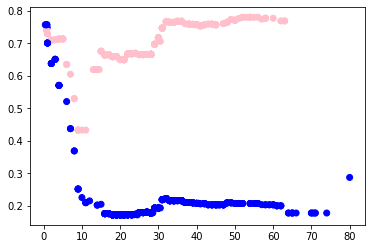

In [132]:
colors = {1:'blue',0:'pink'}
predictions = []
for pred in Randf.predict_proba(X):
    predictions.append(pred[1])

plt.scatter(X['Age'],predictions,c=X['Sex'].apply(lambda x: colors[x]))
plt.show()